In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import  seaborn as sns
sns.set_style("darkgrid")

from Utils import *
from ExperientalTools import *

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
%reload_ext autoreload
%autoreload 2

In [2]:
(tr_x,tr_y), (vl_x,vl_y), (ts_x,ts_y) = prepare_dataset(train_path="datasets/ML-CUP21-TR.csv")

# JUST AN EXAMPLE

In [3]:
model = fit_cholesky(tr_x,tr_y, hidden=100,lambda_=0, activation=sigmoid)

In [4]:
get_results(model,vl_x,vl_y)

2.4362675768778272

In [5]:
instance1 = fit_sgd(tr_x, tr_y, hidden=100, lambda_=0.001, activation=sigmoid, max_inters=2000, eps=0.0001, lr=0, beta=0)
instance2 = fit_sgd(tr_x, tr_y, hidden=100, lambda_=0.001, activation=sigmoid, max_inters=2000, eps=0.0001, lr=0, beta=0.99)     
instance3 = fit_fista(tr_x, tr_y, hidden=50, lambda_=0.001, activation=sigmoid, max_inters=2000, eps=0.0001)

In [6]:
print(f"MSE at the last iteration:\nSGD {instance1[2]}\nSGD-M {instance2[2]}\nFISTA {instance3[2]}")

MSE at the last iteration:
SGD 14.026
SGD-M 13.5025
FISTA 15.2857


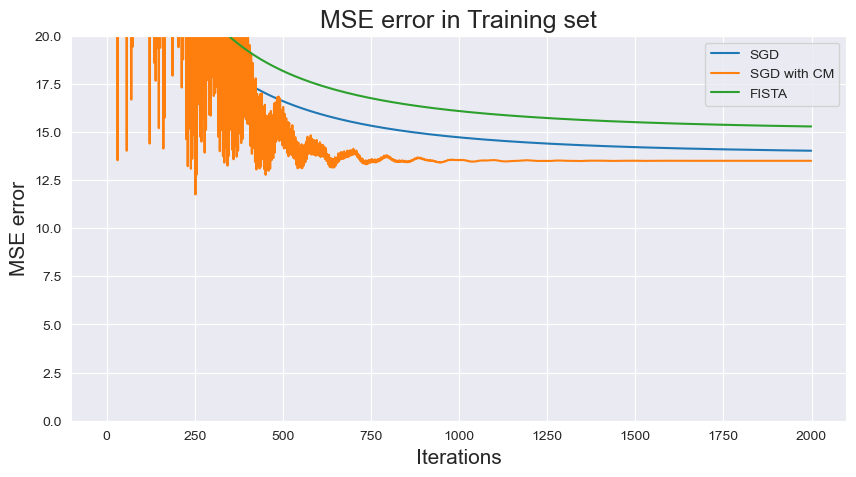

In [7]:
f, axs = plt.subplots(figsize=(10,5))
sns.lineplot(data=instance1[1], x=instance1[1].index, y="MSE_error", ax=axs, label="SGD")
sns.lineplot(data=instance2[1], x=instance2[1].index, y="MSE_error", ax=axs, label="SGD with CM")
sns.lineplot(data=instance3[1], x=instance3[1].index, y="MSE_error", ax=axs, label="FISTA")
axs.set_ylim([0,20])
axs.set_title("MSE error in Training set",fontsize=18)
axs.set_ylabel("MSE error",fontsize=15)
axs.set_xlabel("Iterations",fontsize=15)
axs.legend()
plt.show()

# GRIDSEARCH CHOLESKY

In [8]:
parameter_cholesky = dict(
    hidden=[*range(10,500,10)],
    lambda_ =  [0.001,0.0005],
    activation = [sigmoid, ReLU, tanH]
)

In [9]:
grid_search_cholesky(configs=parameter_cholesky, train=(tr_x,tr_y), valid=(vl_x,vl_y))

100%|██████████| 294/294 [01:35<00:00,  3.09it/s, minMSE=2.07]


The best configuration is  {'activation': <function sigmoid at 0x000001DAF43C2F20>, 'hidden': 360, 'lambda_': 0.001}
Train error  1.027583697478132  Validation error 2.0693531111499244


# GRIDSEARCH FISTA

In [10]:
parameter_fista = dict(
    hidden=[*range(10,500,15)],
    lambda_ =  [0.0005],
    activation = [sigmoid],
    max_inters=[1000, 5000],
    eps=[0]
)

In [11]:
grid_search_iterative(configs=parameter_fista, train=(tr_x,tr_y), valid=(vl_x,vl_y), optimizer="FISTA")

100%|██████████| 66/66 [00:40<00:00,  1.63it/s, minMSE=7.27]


The best configuration is  {'activation': <function sigmoid at 0x000001DAF43C2F20>, 'eps': 0, 'hidden': 40, 'lambda_': 0.0005, 'max_inters': 5000}
Train error  7.968572576223394  Validation error 7.268689957239385


# GRIDSEARCH SDG

In [12]:
parameter_sgd = dict(
    hidden=[*range(10,500,15)],
    lambda_ =  [0.0005],
    activation = [sigmoid],
    max_inters=[1000],
    eps=[0],
    lr=[0],
    beta=[0]
)

In [13]:
grid_search_iterative(configs=parameter_sgd, train=(tr_x,tr_y), valid=(vl_x,vl_y), optimizer="SGD")

100%|██████████| 33/33 [00:07<00:00,  4.35it/s, minMSE=10.4]


The best configuration is  {'activation': <function sigmoid at 0x000001DAF43C2F20>, 'beta': 0, 'eps': 0, 'hidden': 55, 'lambda_': 0.0005, 'lr': 0, 'max_inters': 1000}
Train error  10.977433313730652  Validation error 10.444885231802802


# GRIDSEARCH SGD with CLASSICAL MOMENTUM

In [16]:
parameter_sgd = dict(
    hidden=[*range(10,500,15)],
    lambda_ =  [0.0005],
    activation = [sigmoid],
    max_inters=[1000],
    eps=[0],
    lr=[0],
    beta=[0.99]
)

In [17]:
grid_search_iterative(configs=parameter_sgd, train=(tr_x,tr_y), valid=(vl_x,vl_y), optimizer="SGD")

100%|██████████| 33/33 [00:07<00:00,  4.53it/s, minMSE=9.66]


The best configuration is  {'activation': <function sigmoid at 0x000001DAF43C2F20>, 'beta': 0.99, 'eps': 0, 'hidden': 10, 'lambda_': 0.0005, 'lr': 0, 'max_inters': 1000}
Train error  10.17138834349772  Validation error 9.658713732537388
